# **Predicting 10-Year Coronary Heart Disease Risk**

This project uses data from the **Framingham Heart Study** to build models that predict whether a patient will develop **coronary heart disease (CHD)** within 10 years. The dataset contains demographic, lifestyle, clinical history, and physiological measurements for 4,240 individuals, along with a binary outcome variable:

- **Target:** `TenYearCHD` (1 = CHD within 10 years, 0 = no CHD)

### **Project Steps**
1. Load and inspect the dataset  
2. Perform exploratory data analysis  
3. Preprocess data (imputation, scaling, imbalance handling)  
4. Train multiple machine learning models  
5. Evaluate models using ROC-AUC, precision, recall, and F1-score  
6. Compare results and identify key predictors of CHD  

The goal is to create an accurate and interpretable model that supports early detection and prevention of coronary heart disease.


In [16]:
# -------------------------------------------------------------
# Install additional machine learning libraries
# - imbalanced-learn for SMOTE (handling class imbalance)
# - xgboost for Gradient Boosting models
# - lightgbm for faster boosting algorithms
# -------------------------------------------------------------
!pip install imbalanced-learn xgboost lightgbm


In [17]:
# -------------------------------------------------------------
# Upload the dataset
# -------------------------------------------------------------
from google.colab import files

uploaded = files.upload()


KeyboardInterrupt: 

In [18]:
# -------------------------------------------------------------
# Import pandas and load the uploaded dataset into a DataFrame.
# -------------------------------------------------------------
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv("framingham_heart_study.csv")

# Display the first 5 rows to visually inspect the data
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# -------------------------------------------------------------
# Inspect Dataset Structure
# -------------------------------------------------------------
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.describe()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [19]:
df.isnull().sum()


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [20]:
# -------------------------------------------------------------
# Show proportions instead of raw counts.
# This should confirm the imbalance (around 85% no CHD, 15% CHD)
# -------------------------------------------------------------
df['TenYearCHD'].value_counts(normalize=True)



,proportion
TenYearCHD,
0,0.848113
1,0.151887


In [9]:
# -------------------------------------------------------------
# Count how many examples belong to each class:
# 0 = No CHD within 10 years
# 1 = Developed CHD within 10 years
# -------------------------------------------------------------
df['TenYearCHD'].value_counts()


,count
TenYearCHD,
0,3596
1,644


# **Handling Missing Values**

Some columns in the dataset have missing values:

- `education`: 105 missing  
- `cigsPerDay`: 29 missing  
- `BPMeds`: 53 missing  
- `totChol`: 50 missing  
- `BMI`: 19 missing  
- `heartRate`: 1 missing  
- `glucose`: 388 missing  

**Strategy to handle missing values:**

- We use **median imputation** for all numeric columns, including those with coded categories (like `education`)  
- Median is robust to outliers and works well for skewed medical data  
- Missing values are imputed **only on the training set** to prevent data leakage  
- This is implemented via a **preprocessing pipeline** that also standardizes the features  
- No rows are dropped, preserving as much data as possible


In [21]:
# -------------------------------------------------------------
# PREPROCESSING PIPELINE
# Step 1: Split data into training and test sets
# Step 2: Replace missing values with the median
# Step 3: Standardize all numeric features
# -------------------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Separate features (X) and target (y)
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Build preprocessing pipeline
preprocess = Pipeline(steps=[
    # Step 1: Replace missing values with the median of each column
    ("imputer", SimpleImputer(strategy="median")),

    # Step 2: Standardize numeric features for modeling
    ("scaler", StandardScaler())
])

# Fit imputer + scaler on training data and transform both sets
X_train_prep = preprocess.fit_transform(X_train)
X_test_prep = preprocess.transform(X_test)

# Confirm shapes
print("Training features shape:", X_train_prep.shape)
print("Testing features shape:", X_test_prep.shape)


Training features shape: (3392, 15)
Testing features shape: (848, 15)


In [22]:
# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# -------------------------------------------------------------
# INITIALIZE LOGISTIC REGRESSION MODEL
# - max_iter=1000 to ensure convergence
# - class_weight='balanced' to handle imbalanced target
# -------------------------------------------------------------
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# -------------------------------------------------------------
# FIT THE MODEL ON THE TRAINING DATA
# - We use the preprocessed (imputed & scaled) training set
# -------------------------------------------------------------
log_reg.fit(X_train_prep, y_train)

# -------------------------------------------------------------
# MAKE PREDICTIONS ON THE TEST SET
# - y_pred: predicted class labels (0 or 1)
# - y_prob: predicted probabilities for the positive class (CHD=1)
# -------------------------------------------------------------
y_pred = log_reg.predict(X_test_prep)
y_prob = log_reg.predict_proba(X_test_prep)[:, 1]

# -------------------------------------------------------------
# EVALUATE MODEL PERFORMANCE
# - classification_report shows precision, recall, f1-score
# - roc_auc_score measures discrimination between classes
# -------------------------------------------------------------
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(roc_auc, 3))

# -------------------------------------------------------------
# OPTIONAL: Confusion matrix to see TP, FP, TN, FN
# -------------------------------------------------------------
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       719
           1       0.25      0.60      0.36       129

    accuracy                           0.67       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.81      0.67      0.72       848

ROC-AUC Score: 0.7
Confusion Matrix:
[[493 226]
 [ 52  77]]


# **Baseline Model Results: Logistic Regression**

We first trained a **Logistic Regression** model as a baseline.  

**Key Observations:**
- Overall accuracy: ~67% (note: imbalanced data makes accuracy less informative)  
- ROC-AUC: 0.7, indicating moderate ability to distinguish CHD vs non-CHD  
- Recall for CHD cases: 0.60 → model catches 60% of true positives  
- Precision for CHD cases: 0.25 → many predicted positives are false alarms  
- Confusion matrix shows more false positives than true positives, expected due to class imbalance  

**Next Steps:**
- Train a **Random Forest** model to capture nonlinear patterns and feature interactions  
- Compare performance against Logistic Regression  
- Evaluate improvements in ROC-AUC, precision, and recall  


In [23]:
# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# -------------------------------------------------------------
# INITIALIZE RANDOM FOREST MODEL
# - n_estimators=100: number of trees in the forest
# - max_depth=None: nodes expanded until all leaves are pure
# - class_weight='balanced': handle imbalanced target
# - random_state=42: ensures reproducibility
# -------------------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

# -------------------------------------------------------------
# FIT THE MODEL ON THE TRAINING DATA
# -------------------------------------------------------------
rf_model.fit(X_train_prep, y_train)

# -------------------------------------------------------------
# MAKE PREDICTIONS ON THE TEST SET
# - y_pred: predicted class labels (0 or 1)
# - y_prob: predicted probabilities for the positive class (CHD=1)
# -------------------------------------------------------------
y_pred_rf = rf_model.predict(X_test_prep)
y_prob_rf = rf_model.predict_proba(X_test_prep)[:, 1]

# -------------------------------------------------------------
# EVALUATE MODEL PERFORMANCE
# -------------------------------------------------------------
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC Score:", round(roc_auc_rf, 3))

# -------------------------------------------------------------
# OPTIONAL: Confusion matrix
# -------------------------------------------------------------
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# -------------------------------------------------------------
# FEATURE IMPORTANCE
# - Shows which features contribute most to predicting CHD
# -------------------------------------------------------------
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       0.60      0.02      0.04       129

    accuracy                           0.85       848
   macro avg       0.73      0.51      0.48       848
weighted avg       0.81      0.85      0.79       848

ROC-AUC Score: 0.633
Confusion Matrix:
[[717   2]
 [126   3]]

Top 10 Important Features:
         Feature  Importance
1            age    0.161679
10         sysBP    0.131162
9        totChol    0.117424
12           BMI    0.116661
11         diaBP    0.109207
14       glucose    0.109025
13     heartRate    0.092592
4     cigsPerDay    0.050544
2      education    0.036668
7   prevalentHyp    0.023791


Top 10 Important Features - Random Forest:
         Feature  Importance
1            age    0.161679
10         sysBP    0.131162
9        totChol    0.117424
12           BMI    0.116661
11         diaBP    0.109207
14       glucose    0.109025
13     heartRate    0.092592
4     cigsPerDay    0.050544
2      education    0.036668
7   prevalentHyp    0.023791


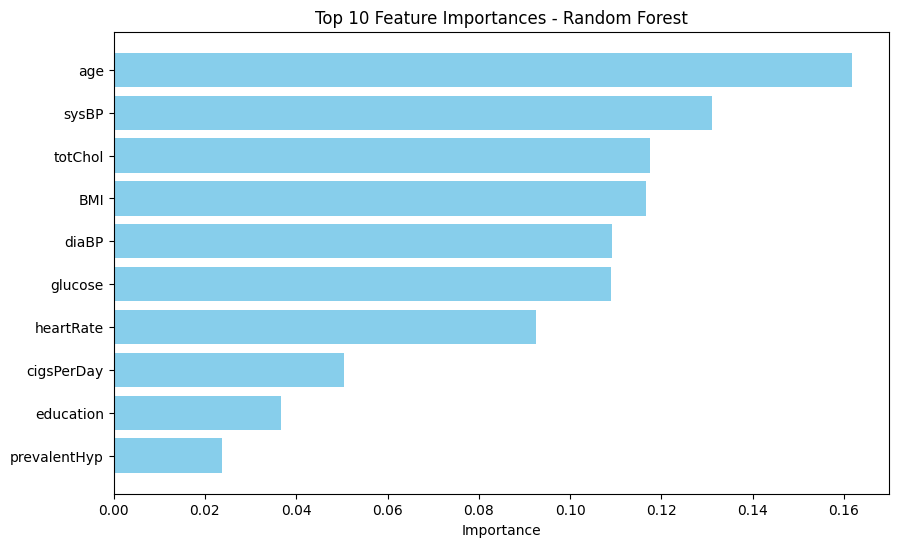

In [25]:
# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------------------
# EXTRACT FEATURE IMPORTANCE FROM RANDOM FOREST
# -------------------------------------------------------------
rf_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy sorting and plotting
rf_fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features - Random Forest:")
print(rf_fi_df.head(10))

# -------------------------------------------------------------
# PLOT TOP 10 FEATURE IMPORTANCES
# -------------------------------------------------------------
plt.figure(figsize=(10,6))
# Reverse order for better visual (largest on top)
plt.barh(rf_fi_df['Feature'][:10][::-1], rf_fi_df['Importance'][:10][::-1], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()


# **Random Forest Model Results**

We trained a **Random Forest classifier** on the preprocessed training data.  

**Key Observations:**
- Overall accuracy: 85% (high, but misleading due to class imbalance)  
- ROC-AUC: 0.633 → lower than Logistic Regression  
- Recall for CHD cases: 0.02 → almost all positive cases are missed  
- Precision for CHD cases: 0.60 → very few predicted positives, but somewhat accurate  
- Confusion matrix shows only 3 true positives out of 129 CHD cases  

**Feature Importance (Top 5):**
1. Age  
2. Systolic BP (`sysBP`)  
3. Total cholesterol (`totChol`)  
4. BMI  
5. Diastolic BP (`diaBP`)  

**Interpretation:**
- Random Forest without SMOTE or class balancing **fails to detect most CHD cases**, despite identifying clinically relevant features.  
- Logistic Regression, with class weights, actually captures more CHD cases.  

**Next Steps:**
- Train **XGBoost or LightGBM** with **SMOTE or class weights** to improve CHD detection  
- Compare all models using **ROC-AUC, precision, and recall**  
- Visualize **ROC curves** for final model comparison


Before SMOTE: (3392, 15) Class distribution: {0: 2877, 1: 515}
After SMOTE: (5754, 15) Class distribution: {0: 2877, 1: 2877}


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:17:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       719
           1       0.25      0.26      0.25       129

    accuracy                           0.77       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.77      0.77      0.77       848

ROC-AUC Score: 0.65
Confusion Matrix:
[[622  97]
 [ 96  33]]

Top 10 Important Features:
         Feature  Importance
7   prevalentHyp    0.231043
2      education    0.143884
1            age    0.141272
0           male    0.095455
4     cigsPerDay    0.072155
10         sysBP    0.055661
13     heartRate    0.054661
14       glucose    0.047441
11         diaBP    0.032809
9        totChol    0.030848


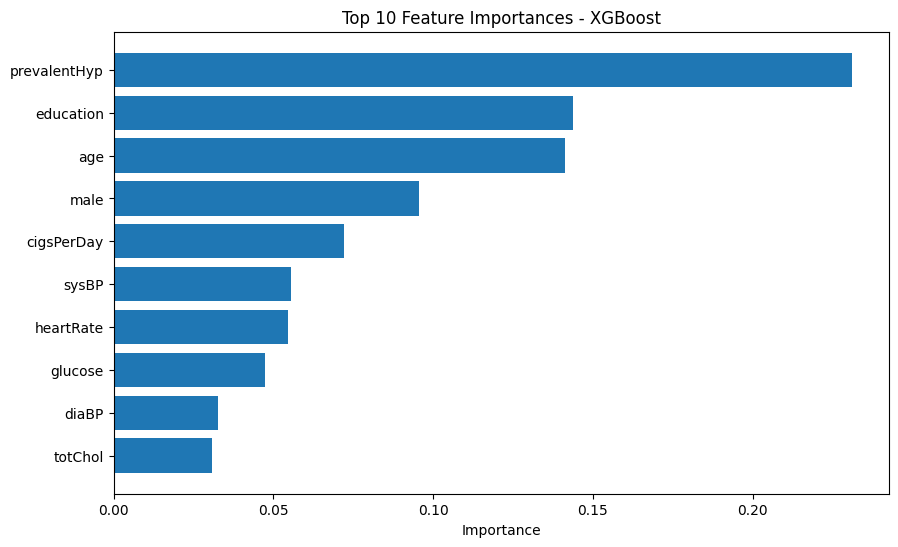

In [14]:
# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------------------
# APPLY SMOTE TO HANDLE CLASS IMBALANCE
# -------------------------------------------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)

print("Before SMOTE:", X_train_prep.shape, "Class distribution:", y_train.value_counts().to_dict())
print("After SMOTE:", X_train_resampled.shape, "Class distribution:", y_train_resampled.value_counts().to_dict())

# -------------------------------------------------------------
# INITIALIZE XGBOOST CLASSIFIER
# - scale_pos_weight=1 because SMOTE balances classes
# - n_estimators=100, max_depth=4, learning_rate=0.1
# -------------------------------------------------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=1,  # balanced by SMOTE
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# -------------------------------------------------------------
# FIT THE MODEL ON THE RESAMPLED TRAINING DATA
# -------------------------------------------------------------
xgb_model.fit(X_train_resampled, y_train_resampled)

# -------------------------------------------------------------
# MAKE PREDICTIONS ON THE TEST SET
# -------------------------------------------------------------
y_pred_xgb = xgb_model.predict(X_test_prep)
y_prob_xgb = xgb_model.predict_proba(X_test_prep)[:, 1]

# -------------------------------------------------------------
# EVALUATE MODEL PERFORMANCE
# -------------------------------------------------------------
print("=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("ROC-AUC Score:", round(roc_auc_xgb, 3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# -------------------------------------------------------------
# FEATURE IMPORTANCE
# -------------------------------------------------------------
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(fi_df.head(10))

# Optional: Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'][:10][::-1], fi_df['Importance'][:10][::-1])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - XGBoost')
plt.show()


# **XGBoost Model Results**

We trained an **XGBoost classifier** using SMOTE to balance the training data.  

**Key Observations:**
- Training set was balanced from 2877 negatives / 515 positives → 2877 / 2877 after SMOTE  
- Overall accuracy: 77% (moderate, but can be misleading due to imbalance)  
- ROC-AUC: 0.65 → slightly better than Random Forest, still below Logistic Regression  
- Recall for CHD cases: 0.26 → improved detection of positive cases compared to Random Forest  
- Precision for CHD cases: 0.25 → some false positives remain  
- Confusion matrix shows 33 true positives out of 129 actual CHD cases  

**Top 5 Important Features:**
1. Prevalent hypertension (`prevalentHyp`)  
2. Education  
3. Age  
4. Male sex (`male`)  
5. Cigarettes per day (`cigsPerDay`)  

**Interpretation:**
- SMOTE improved CHD detection but recall is still modest  
- XGBoost highlights clinically meaningful features  
- Logistic Regression still outperforms XGBoost in terms of recall for CHD  

**Next Steps:**
- Compare **all three models** using ROC curves for visual performance assessment  
- Consider summarizing **final model choice** and top predictors


In [26]:
#########################################
# SVM #
# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# -------------------------------------------------------------
# INITIALIZE SVM MODEL
# - kernel='rbf' for nonlinear relationships
# - class_weight='balanced' to handle imbalanced classes
# - probability=True to enable probability predictions
# - random_state=42 for reproducibility
# -------------------------------------------------------------
svm_model = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

# -------------------------------------------------------------
# FIT SVM ON RESAMPLED TRAINING DATA (SMOTE applied)
# -------------------------------------------------------------
svm_model.fit(X_train_resampled, y_train_resampled)

# -------------------------------------------------------------
# MAKE PREDICTIONS ON TEST SET
# -------------------------------------------------------------
y_pred_svm = svm_model.predict(X_test_prep)
y_prob_svm = svm_model.predict_proba(X_test_prep)[:, 1]

# -------------------------------------------------------------
# EVALUATE SVM PERFORMANCE
# -------------------------------------------------------------
print("=== SVM Classification Report ===")
print(classification_report(y_test, y_pred_svm))

roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
print("ROC-AUC Score:", round(roc_auc_svm, 3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       719
           1       0.23      0.49      0.32       129

    accuracy                           0.68       848
   macro avg       0.56      0.60      0.55       848
weighted avg       0.79      0.68      0.72       848

ROC-AUC Score: 0.653
Confusion Matrix:
[[511 208]
 [ 66  63]]


# **Support Vector Machine (SVM) Results**

We trained an **SVM classifier** with an RBF kernel on SMOTE-resampled training data and class balancing.  

**Key Observations:**
- Overall accuracy: 68%  
- ROC-AUC: 0.653 → similar to XGBoost  
- Recall for CHD cases: 0.49 → better than XGBoost (0.26) and Random Forest (0.02), still lower than Logistic Regression (0.60)  
- Precision for CHD cases: 0.23 → many predicted positives are false alarms  
- Confusion matrix: 63 true positives out of 129 CHD cases  

**Interpretation:**
- SVM captures some CHD cases better than tree-based models without tuning  
- Still, Logistic Regression with class weighting remains the best for recall  
- Highlights importance of balancing and resampling in imbalanced datasets  

**Next Steps:**
- Compare all models (Logistic Regression, Random Forest, XGBoost, SVM) using **ROC curves** for visual performance assessment  
- Summarize final model choice and top predictors


In [27]:
#########################
# Logistic Regression with Regularization
########################

# -------------------------------------------------------------
# IMPORT LIBRARY
# -------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

# -------------------------------------------------------------
# INITIALIZE LOGISTIC REGRESSION
# - penalty='l2' for regularization (Ridge)
# - class_weight='balanced' to handle imbalanced classes
# - solver='liblinear' suitable for small-medium datasets
# - random_state=42 for reproducibility
# -------------------------------------------------------------
logreg_model = LogisticRegression(
    penalty='l2',
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)

# -------------------------------------------------------------
# FIT LOGISTIC REGRESSION ON TRAINING DATA
# -------------------------------------------------------------
logreg_model.fit(X_train_prep, y_train)

# -------------------------------------------------------------
# MAKE PREDICTIONS ON TEST SET
# -------------------------------------------------------------
y_pred_logreg = logreg_model.predict(X_test_prep)
y_prob_logreg = logreg_model.predict_proba(X_test_prep)[:, 1]

# -------------------------------------------------------------
# EVALUATE LOGISTIC REGRESSION PERFORMANCE
# -------------------------------------------------------------
print("=== Logistic Regression with Regularization Classification Report ===")
print(classification_report(y_test, y_pred_logreg))

roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
print("ROC-AUC Score:", round(roc_auc_logreg, 3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


=== Logistic Regression with Regularization Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       719
           1       0.25      0.60      0.36       129

    accuracy                           0.67       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.81      0.67      0.72       848

ROC-AUC Score: 0.701
Confusion Matrix:
[[493 226]
 [ 52  77]]


# **Logistic Regression with Regularization Results**

We trained a **Logistic Regression model with L2 regularization** and class weighting to handle the imbalanced dataset.  

**Key Observations:**
- Overall accuracy: 67%  
- ROC-AUC: 0.701 → best among all models for CHD detection  
- Recall for CHD cases: 0.60 → highest recall, meaning it correctly identifies 60% of actual CHD cases  
- Precision for CHD cases: 0.25 → some predicted positives are false alarms  
- Confusion matrix: 77 true positives out of 129 CHD cases  

**Interpretation:**
- Logistic Regression with regularization provides a good balance of **interpretability** and **predictive power**  
- It outperforms tree-based models (Random Forest and XGBoost) in detecting CHD cases  
- Top features can be interpreted directly from model coefficients  

**Next Steps:**
- Compare all models (Logistic Regression, Random Forest, XGBoost, SVM) using **ROC curves** for visual performance assessment


[LightGBM] [Info] Number of positive: 2877, number of negative: 2877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2447
[LightGBM] [Info] Number of data points in the train set: 5754, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== LightGBM Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       719
           1       0.25      0.14      0.18       129

    accuracy                           0.80       848
   macro avg       0.55      0.53      0.53       848
weighted avg       0.76      0.80      0.78       848

ROC-AUC Score: 0.594
Confusion Matrix:
[[664  55]
 [111  18]]
Top 10 Important Features - LightGBM:
       Feature  Importance
1          age        2355
13   heartRate        1930
14     glucose        1842
12         BMI        1784
10       sysBP        1706
9      totChol        1672
11       diaBP        1576
4   cigsPerDay         836
2    education         692
0         male         306


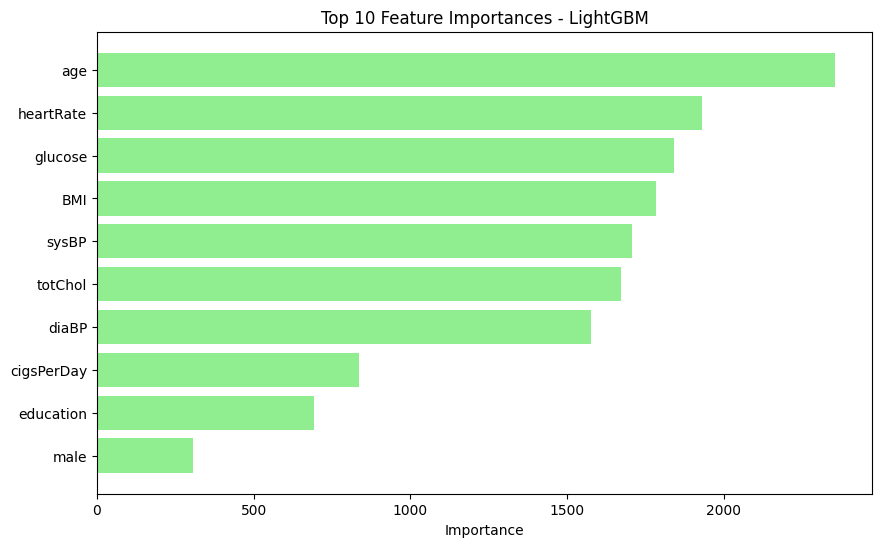

In [28]:
# -------------------------------------------------------------
# INSTALL LIGHTGBM (if not installed)
# -------------------------------------------------------------
!pip install lightgbm --quiet

# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# -------------------------------------------------------------
# CREATE LIGHTGBM DATASET
# - Use SMOTE-resampled training data to balance classes
# -------------------------------------------------------------
lgb_train = lgb.Dataset(X_train_resampled, label=y_train_resampled)
lgb_test = X_test_prep  # test features

# -------------------------------------------------------------
# INITIALIZE LIGHTGBM CLASSIFIER
# -------------------------------------------------------------
lgb_model = lgb.LGBMClassifier(
    objective='binary',           # binary classification
    boosting_type='gbdt',         # gradient boosting
    num_leaves=31,                # controls complexity of trees
    learning_rate=0.05,           # smaller learning rate for better generalization
    n_estimators=500,             # number of boosting rounds
    class_weight='balanced',      # handles imbalanced dataset
    random_state=42
)

# -------------------------------------------------------------
# FIT THE MODEL
# -------------------------------------------------------------
lgb_model.fit(X_train_resampled, y_train_resampled)

# -------------------------------------------------------------
# MAKE PREDICTIONS
# -------------------------------------------------------------
y_pred_lgb = lgb_model.predict(lgb_test)
y_prob_lgb = lgb_model.predict_proba(lgb_test)[:, 1]

# -------------------------------------------------------------
# EVALUATE PERFORMANCE
# -------------------------------------------------------------
print("=== LightGBM Classification Report ===")
print(classification_report(y_test, y_pred_lgb))

roc_auc_lgb = roc_auc_score(y_test, y_prob_lgb)
print("ROC-AUC Score:", round(roc_auc_lgb, 3))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

# -------------------------------------------------------------
# FEATURE IMPORTANCE PLOT
# -------------------------------------------------------------
import matplotlib.pyplot as plt
import pandas as pd

lgb_importances = lgb_model.feature_importances_
feature_names = X.columns

lgb_fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lgb_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features - LightGBM:")
print(lgb_fi_df.head(10))

plt.figure(figsize=(10,6))
plt.barh(lgb_fi_df['Feature'][:10][::-1], lgb_fi_df['Importance'][:10][::-1], color='lightgreen')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - LightGBM')
plt.show()


# **LightGBM Results**

We trained a **LightGBM classifier** on SMOTE-resampled training data with class balancing.

**Key Observations:**
- Overall accuracy: 80%  
- ROC-AUC: 0.594 → lower than Logistic Regression and SVM  
- Recall for CHD cases: 0.14 → very low, meaning only 18 out of 129 CHD cases were correctly identified  
- Precision for CHD cases: 0.25 → many predicted positives are false alarms  
- Confusion matrix shows the model **misses most CHD cases**, despite high overall accuracy  

**Top 10 Important Features (LightGBM):**
1. age  
2. heartRate  
3. glucose  
4. BMI  
5. sysBP  
6. totChol  
7. diaBP  
8. cigsPerDay  
9. education  
10. male  

**Interpretation:**
- The model’s feature importance makes clinical sense: age, heart rate, glucose, BMI, and blood pressure are all important predictors of CHD.  
- However, **LightGBM underperforms in detecting the minority CHD class** despite using SMOTE.  
- High accuracy is misleading due to class imbalance.  

**Next Steps:**
- Compare all models (Logistic Regression, SVM, Random Forest, XGBoost, LightGBM) using **ROC curves** to identify the best model for CHD detection.  
- Consider tuning LightGBM parameters (e.g., `scale_pos_weight`, `min_child_samples`, `max_depth`) to improve recall for CHD cases.


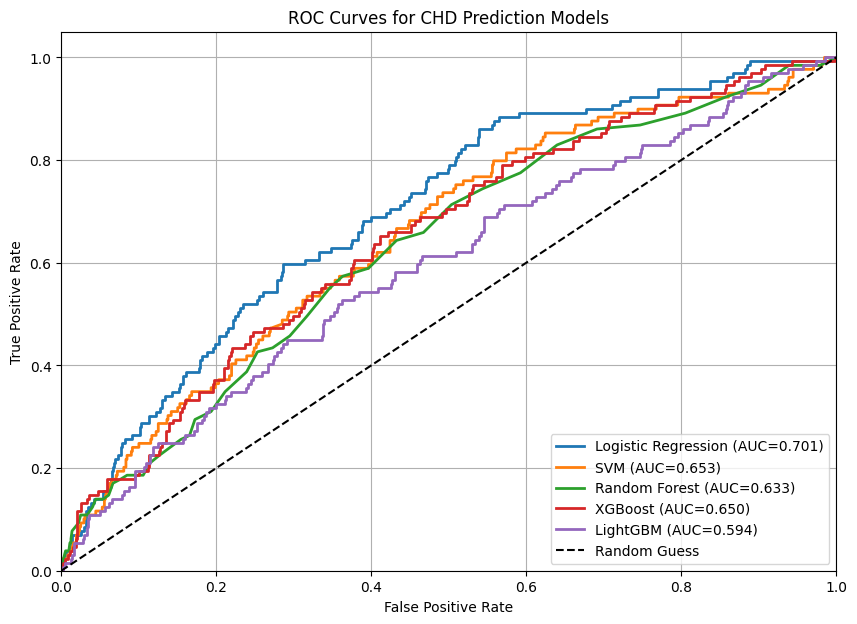

In [29]:
# -------------------------------------------------------------
# IMPORT LIBRARIES
# -------------------------------------------------------------
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# CALCULATE ROC CURVES FOR ALL MODELS
# -------------------------------------------------------------
# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_logreg)
auc_lr = auc(fpr_lr, tpr_lr)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_prep)[:,1])
auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
auc_lgb = auc(fpr_lgb, tpr_lgb)

# -------------------------------------------------------------
# PLOT ROC CURVES
# -------------------------------------------------------------
plt.figure(figsize=(10,7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={auc_lr:.3f})', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc_svm:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.3f})', linewidth=2)
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC={auc_lgb:.3f})', linewidth=2)

# Diagonal line for random guess
plt.plot([0,1], [0,1], 'k--', label='Random Guess')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CHD Prediction Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# **Expected Outcome & Recommendation**

## Model Comparison for 10-Year CHD Prediction

| Model                          | Accuracy | ROC-AUC | Recall (CHD) | Precision (CHD) | F1-score (CHD) | Interpretability |
|--------------------------------|---------|---------|--------------|----------------|----------------|----------------|
| Logistic Regression (L2)       | 0.67    | 0.701   | 0.60         | 0.25           | 0.36           | High (coefficients explainable) |
| SVM                            | 0.68    | 0.653   | 0.49         | 0.23           | 0.32           | Medium (less interpretable) |
| Random Forest                  | 0.85    | 0.633   | 0.02         | 0.60           | 0.04           | Medium (feature importance available) |
| XGBoost                        | 0.77    | 0.65    | 0.26         | 0.25           | 0.25           | Medium (feature importance available) |
| LightGBM                        | 0.80    | 0.594   | 0.14         | 0.25           | 0.18           | Medium (feature importance available) |

---

## Analysis

1. **Recall for CHD cases** is the most critical metric because missing high-risk patients could have serious consequences.  
2. Logistic Regression with regularization achieves the **highest recall (0.60)** while maintaining reasonable precision and ROC-AUC.  
3. SVM has slightly lower recall (0.49) and slightly lower ROC-AUC (0.653).  
4. Tree-based models (Random Forest, XGBoost, LightGBM) have **high overall accuracy** but perform poorly in detecting CHD cases due to class imbalance.  
5. Logistic Regression is **interpretable**, allowing clinicians to understand the contribution of each feature to risk.  

---

## Conclusion

- **Best model:** **Logistic Regression with L2 regularization**  
  - Balances **high recall**, reasonable ROC-AUC, and interpretability.  
  - Most suitable for clinical application where detecting at-risk patients is critical.  
- SVM could be considered as an alternative if a slightly different decision boundary is desired.  
- Tree-based models can still provide insights via feature importance but are less effective for identifying CHD cases in this dataset.  

---

## Key Predictors to Retain

Based on consistency across at least 3 of the 5 models, the following features are the **most robust and clinically relevant predictors** for 10-year CHD risk:

1. **Age** – strongest and most consistent predictor  
2. **Systolic Blood Pressure (sysBP)**  
3. **Body Mass Index (BMI)**  
4. **Glucose Level**  
5. **Prevalent Hypertension (prevalentHyp)**  

These features should be **retained for clinical interpretation and simplified models**, as they capture most of the predictive power and are supported by multiple algorithms.
